# Change the sigma parameters of a DFT permittivity
Start by importing some useful routines

In [1]:
import numpy                      as np
import sys
sys.path.insert(0, "../../..")     # This should allow the PDielec modules to be found
from PDielec.HelperRoutines   import getMaterial
from PDielec.HelperRoutines   import calculatePowderSpectrum
from PDielec.HelperRoutines   import calculateSingleCrystalSpectrum


## Define the materials to be used.
In this example we read the VASP file in the current directory
The OUTCAR in this directory is for a VASP calculation on ZnO
The support material will be PTFE

In [2]:
ZnO = getMaterial('ZnO/OUTCAR')
matrix = getMaterial('ptfe')

## Calculate the absorption using MG effective medium theory


In [3]:
frequencies = np.arange(200,500,0.2)
absorption1 = calculatePowderSpectrum(frequencies,ZnO,matrix,0.1)

## Get a copy of the sigma parameters for ZnO (this only works for Drude-Lorentz materials)
At the same time we get the oscillator strengths a

In [4]:
sigmas = ZnO.getSigmas()
strengths = ZnO.getOscillatorStrengths()
vs = ZnO.getFrequencies()
print(sigmas)
print(vs)

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[3.10576726e-06 4.30587663e-06 7.30695764e-06 9.12470932e+01
 9.12470932e+01 2.46103746e+02 3.49991043e+02 3.72089654e+02
 3.72089654e+02 4.02064490e+02 4.02064490e+02 5.08221172e+02]


## Compare the absorption coefficients for two different sets of sigma
Also the calculated absorption peak frequencies in the second spectrum are scaled by 1.2

In [5]:
frequencies = np.arange(200,500,0.2)
absorption1,permittivity = calculatePowderSpectrum(frequencies,ZnO,matrix,0.1)
sigmas = [ 10.0 for i in sigmas ]
vs = [ 1.2*v for v in vs ]
ZnO.setSigmas(sigmas)
ZnO.setFrequencies(vs)
# ZnO.setFrequencies(vs)
absorption2,permittivity = calculatePowderSpectrum(frequencies,ZnO,matrix,0.1)

## Plot the results to compare the two calculations

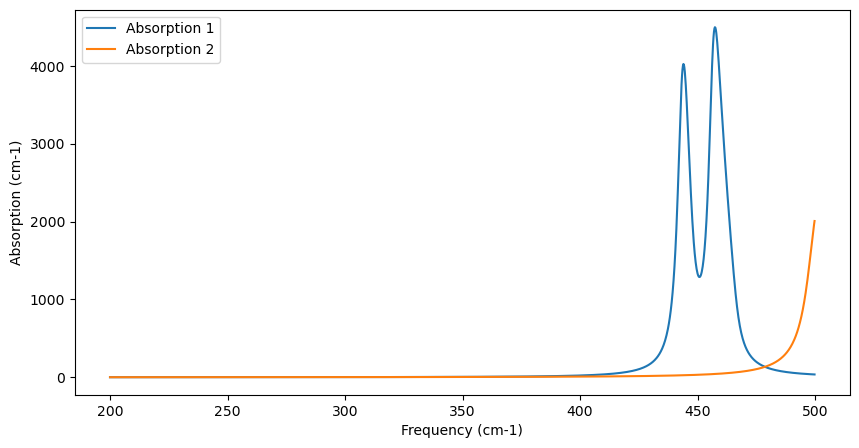

(<matplotlib.legend.Legend at 0x7eb4c16ebdd0>, None)

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(frequencies, absorption1,label='Absorption 1') 
plt.plot(frequencies, absorption2,label='Absorption 2')
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Absorption (cm-1)')
plt.legend(), plt.show()